<a href="https://colab.research.google.com/github/joominyeo/ECE107-Project/blob/main/E107_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ECE107 Project 2020, Lomakin
## Numerical Capacitance Extraction Implementation via Discretization
Clyde Baron Rapinan & Joo Min Yeo

A15418197 & A13678662


## Dependancies
- run this codebock first to load in dependancies

In [ ]:
import numpy as np
import time as Time
#plotting in 3D
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#Timing 
import time
#helper functions
inv=np.linalg.inv
norm=np.linalg.norm

##Problem #1: Formulas

Integral formula:

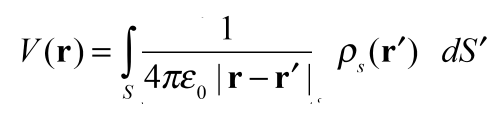


We will be implementing the following discretized formula:


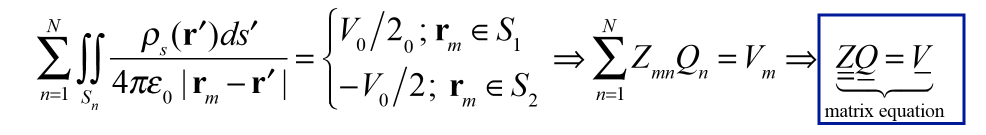

##Problem #2: Discretized Method

Optimized code

In [ ]:
def discretized_Method(vo,l,w,d,nx,ny,showTime=False,testing=False):
  # v0 is initial voltage, 
  # l & w are dimensions of the plates, but for the requirements, we areassuming they are the same
  #  nx and ny the the number of partitions we wish in the x and y directions. these determine patch size
  epsilon0=8.85*10**-12  
  dx=w/nx #patch width
  dy=l/ny #patch length
  if not testing and dx>d and dy>d:
    print('ERR: patch dimensions should not be bigger the intermidiate distance d')
    return []
  ds = dx*dy # patch area
  N1=nx*ny #num patches for one plate
  N=2*N1 #total for both plates
  # get v
  v=np.asarray([vo/2 if i<N1 else -vo/2 for i in range(N)]).reshape(N,1)
  #get r
  start_time_r=Time.time()
  rx=[(dx*x)+dx/2.0 for x in range(nx)] #get all rx 
  ry=[(dy*y)+dy/2.0 for y in range(ny)] #get all rx for 1 plate
  mesh = np.array(np.meshgrid(rx, ry)) #mesh them (all points in rx to ry)
  r1 = mesh.T.reshape(-1, 2) #resphe to fit proper format
  rxy= np.vstack((r1,r1)) #stack for both pplates
  r=np.asarray([[p[0],p[1],d/2 if i<N1 else d+d/2.0] for i,p in enumerate(rxy)]) #set tip plate to d/2 and bottom to d+d/2
  if showTime: print(f'time elspased for r {Time.time()-start_time_r}')
  if testing: print(r)
  if showTime: print(f'shape of r {np.shape(r)}')
  # get z
  start_time_r=Time.time()
  zdef=1/(2*epsilon0*np.sqrt(np.pi*ds)) #default value of z
  z=np.ones((N,N))*zdef #initialize z
  for m in range(0,N):
    for n in range(m,N): 
      if n!=m: #because distance its the same for dist(a-b) and dist(b-a)
        z[m][n]=1/(4*np.pi*epsilon0)/norm(r[m]-r[n])
        z[n][m]=1/(4*np.pi*epsilon0)/norm(r[m]-r[n])
  if testing: print(f'z:\n{np.around(z/(10**9),3)}')
  if showTime: print(f'time elspased for z {Time.time()-start_time_r}')
  if showTime: print(f'shape of z:{np.shape(z)} shape of v:{np.shape(v)}')
  # calc Q
  Q=inv(z)@v
  if showTime: print(f'shape of Q(output) {np.shape(Q)}')
  # calc C
  C=np.sum(Q[0:N1])/vo
  # qq for graphing
  qq=np.reshape(Q[0:N1],(nx,ny))
  if testing: 
    print(C)
    print(qq)
  return [C,Q,qq]
#testing disables patch size check and prints v, z, Q, C, and Q
#showTime toggles if we display the times or not
C,Q,qq=discretized_Method(vo=1,l=10,w=10,d=1,nx=40,ny=40,showTime=True,testing=False)
print(C)

time elspased for r 0.00481724739074707
shape of r (3200, 3)
time elspased for z 67.80951189994812
shape of z:(3200, 3200) shape of v:(3200, 1)
shape of Q(output) (3200, 1)
1.1575127933146096e-09


##Plotting Block for a single entry (testing)

Code for 3-D graph plotting


In [ ]:

# # print(qq)
# fig = plt.figure()
# ax = fig.gca(projection='3d')

# # Make data.
# X = range(np.shape(qq)[0])
# # print(X)
# Y = range(np.shape(qq)[1])
# X, Y = np.meshgrid(X, Y)
# # Plot the surface. matching matlab default schema
# surf = ax.plot_surface(X, Y, qq,cmap='viridis')
# fig.colorbar(surf)
# plt.show()
# print(np.shape(qq))

##Problem #3: Plotting Different Patch Sizes

Plot sizes ranging from 100 to 2500


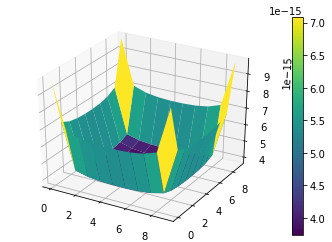

(10, 10)
Number of Patches: 100


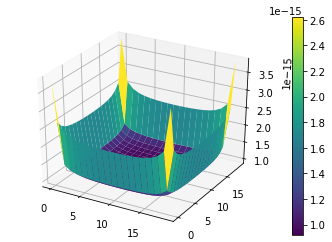

(20, 20)
Number of Patches: 400


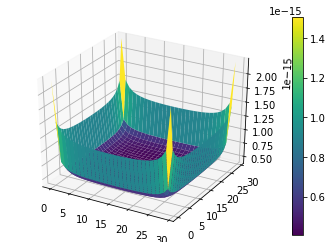

(30, 30)
Number of Patches: 900


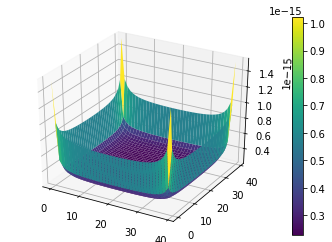

(40, 40)
Number of Patches: 1600


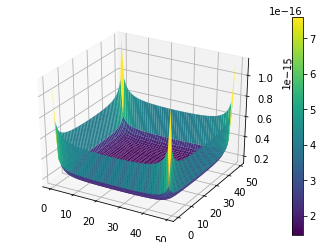

(50, 50)
Number of Patches: 2500


In [ ]:
for i in range(1,6):
  C,Q,qq=discretized_Method(vo=1,l=0.01,w=0.01,d=0.003,nx=10*i,ny=10*i,showTime=False,testing=False)

  # print(qq)
  fig = plt.figure()
  ax = fig.gca(projection='3d')

  # Make data.
  X = range(np.shape(qq)[0])
  # print(X)
  Y = range(np.shape(qq)[1])
  X, Y = np.meshgrid(X, Y)
  # Plot the surface. matching matlab default schema
  surf = ax.plot_surface(X, Y, qq,cmap='viridis')
  fig.colorbar(surf)
  plt.show()
  print(np.shape(qq))
  print(f'Number of Patches: {(10*i)**2}')

As we increase the patch size, we can see the distinct rise in charge.

##Problem #4: Distance vs. Capacitance Graph

Comparing approximate formula to discreticized formula

In [ ]:
cary = []
dary = []
capproxary = []
a=0.01

epsilon0=8.85*(10**(-12))

for i in range(1,41, 3): # in mm
  C,Q,qq=discretized_Method(vo=1,l=0.01,w=0.01,d=i*10**(-3),nx=20,ny=20,showTime=False,testing=False) # correct parameters

  cary.append(C)
  capproxary.append(epsilon0*(a**2)/(i*10**(-3)))
  dary.append(i*10**(-3))

print(f'Capacitance: {cary}')
print(f'C approximation: {capproxary}')
print(f'Distance: {dary}')
 


Capacitance: [1.1594603325935378e-12, 4.38793109557228e-13, 3.3358583980401584e-13, 2.9142039426137433e-13, 2.6899216029717853e-13, 2.552251576828844e-13, 2.459855175273433e-13, 2.3938877891361256e-13, 2.344593106176554e-13, 2.306444690698504e-13, 2.276092552878882e-13, 2.2513949138938607e-13, 2.23092215740858e-13, 2.2136854244953312e-13]
C approximation: [8.849999999999999e-13, 2.2124999999999997e-13, 1.264285714285714e-13, 8.849999999999999e-14, 6.807692307692307e-14, 5.531249999999999e-14, 4.657894736842105e-14, 4.0227272727272725e-14, 3.539999999999999e-14, 3.160714285714285e-14, 2.854838709677419e-14, 2.6029411764705876e-14, 2.3918918918918916e-14, 2.2124999999999997e-14]
Distance: [0.001, 0.004, 0.007, 0.01, 0.013000000000000001, 0.016, 0.019, 0.022, 0.025, 0.028, 0.031, 0.034, 0.037, 0.04]


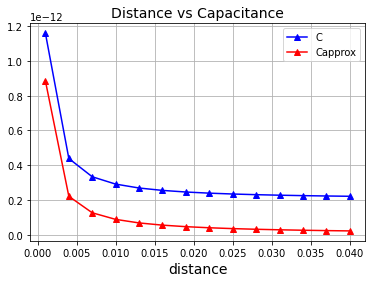

In [ ]:
import pandas as pd

Data={'distance':dary,
      "C":cary,
      "Capprox":capproxary
      }
df = pd.DataFrame(Data,columns=['distance','C','Capprox']);
plt.figure().set_facecolor('#FFFFFF') #for aesthetics, set backround to white
plt.plot(df['distance'], df['C'], color='blue', marker='^',label="C")
plt.plot(df['distance'], df['Capprox'], color='red', marker='^',label="Capprox")
plt.title(f'Distance vs Capacitance', fontsize=14)
plt.xlabel('distance', fontsize=14)
# plt.ylim(jmin[np.nonzero(jmin)[0][-1]]-3, jmax[1]+3)
plt.legend() #to tell which is which
plt.grid(True) #easy on the eyes

The approximation and actual value are closest to eachother when the distance is closest to 0. They become further apart as the distance increases.